In [1]:
import pandas as pd
df = pd.read_csv('exchange_rate.csv')
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [2]:
# Check for missing values
df.isnull().sum()

# Fill or interpolate missing values if necessary
df = df.fillna(method='ffill')

<Axes: >

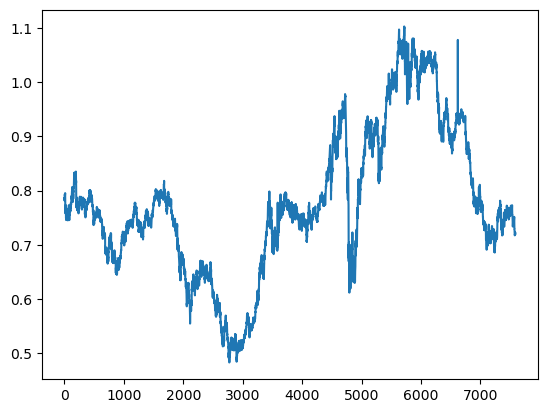

In [3]:
# line plot
df.Ex_rate.plot()

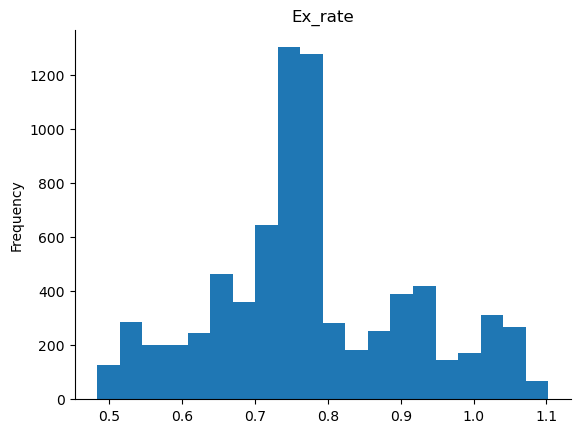

In [4]:
from matplotlib import pyplot as plt
df['Ex_rate'].plot(kind='hist', bins=20, title='Ex_rate')
plt.gca().spines[['top', 'right',]].set_visible(False)

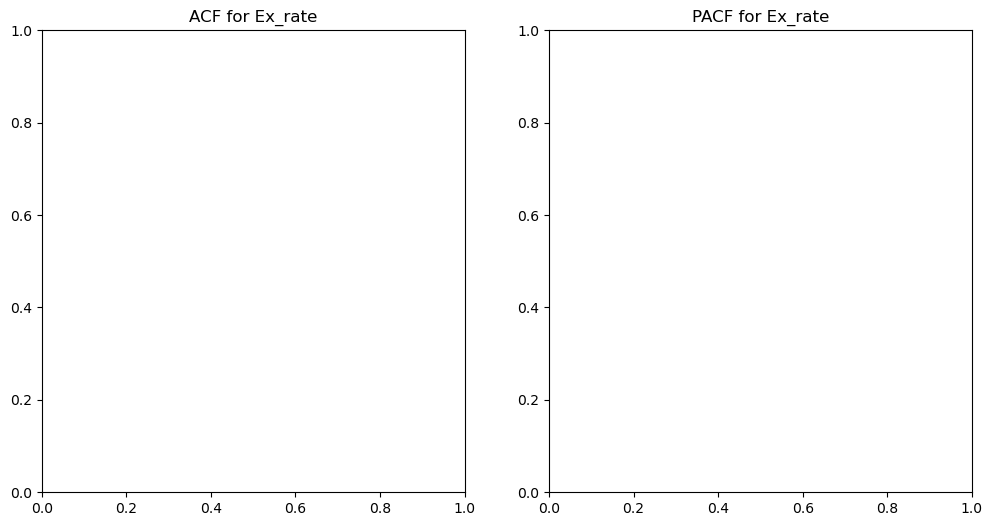

Estimated parameters for Ex_rate: p=2, d=1, q=1


In [5]:
# Import necessary libraries
from statsmodels.tsa.stattools import acf, pacf

# Select one currency time series
currency = df['Ex_rate']

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
acf(currency, nlags=20)
plt.title('ACF for ' + currency.name)

plt.subplot(1, 2, 2)
pacf(currency, nlags=20)
plt.title('PACF for ' + currency.name)
plt.show()

# Estimate initial parameters based on plots
p = 2 # Number of autoregressive terms
d = 1 # Number of differencing terms
q = 1 # Number of moving average terms

print(f'Estimated parameters for {currency.name}: p={p}, d={d}, q={q}')

In [6]:
# 2.	Model Fitting: Fit the ARIMA model with the selected parameters to the preprocessed time series.

# Import necessary libraries
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(df['Ex_rate'], order=(p, d, q))
results = model.fit()

# Print the model summary
print(results)

C:\Users\ROSHIT\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ROSHIT\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


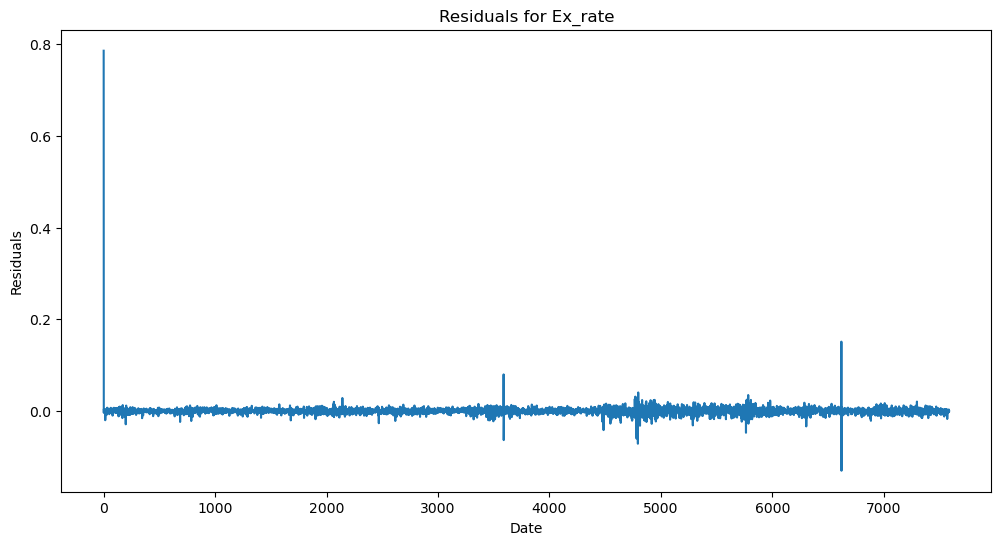

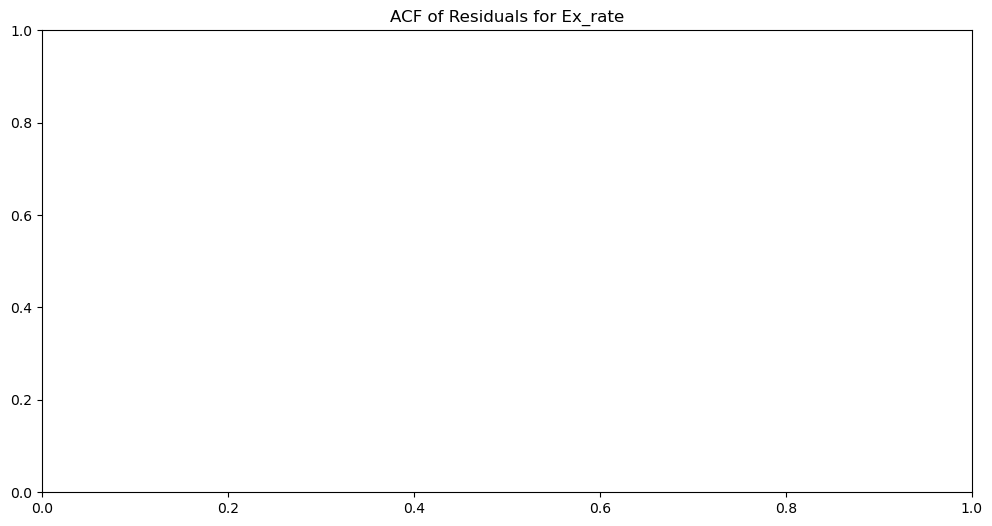

C:\Users\ROSHIT\AppData\Local\Temp\ipykernel_2244\3360804689.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, kde=True)


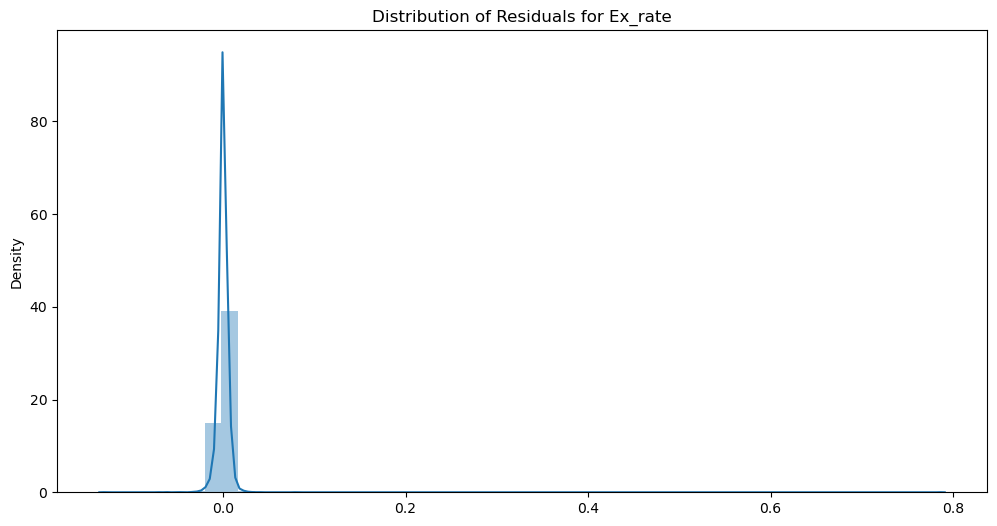

In [7]:
#3.	Diagnostics: Analyze the residuals to ensure there are no patterns that might indicate model inadequacies

# Extract the residuals from the fitted model
residuals = results.resid
import seaborn as sns
# Plot the residuals over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, residuals)
plt.title('Residuals for ' + currency.name)
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

# Check for autocorrelation in the residuals
plt.figure(figsize=(12, 6))
acf(residuals, nlags=20)
plt.title('ACF of Residuals for ' + currency.name)
plt.show()

# Check for normality of the residuals
plt.figure(figsize=(12, 6))
sns.distplot(residuals, kde=True)
plt.title('Distribution of Residuals for ' + currency.name)
plt.show()

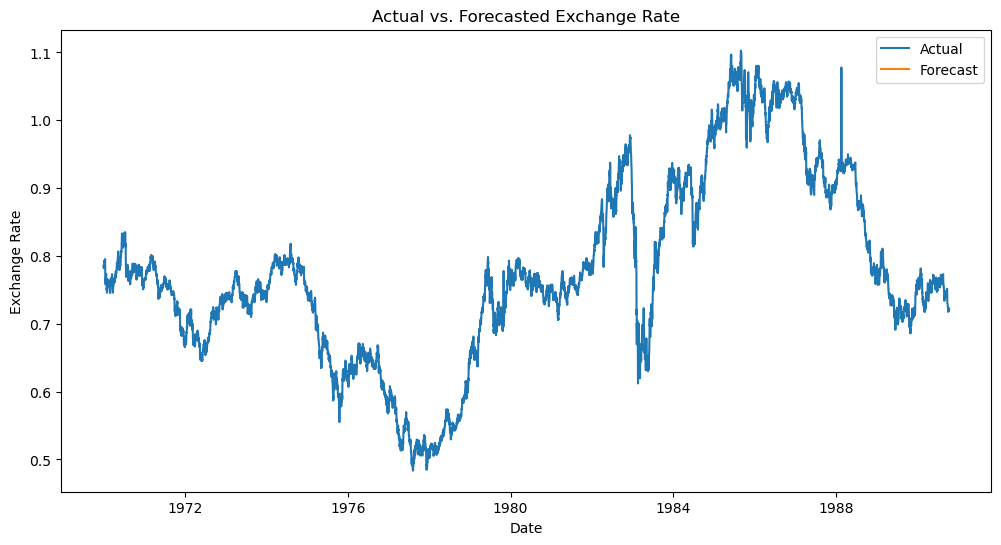

In [8]:
#4.	Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.

# Import necessary libraries

# Define the number of steps to forecast
n_steps = 10

# Forecast the next n_steps values
forecast = results.forecast(steps=n_steps)

# Create a new dataframe to store the forecasted values
forecast_df = pd.DataFrame({'Forecast': forecast}, index=pd.date_range(start=df.index[-1], periods=n_steps + 1, freq='D'))

# Plot the actual and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Ex_rate'], label='Actual')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast')
plt.title('Actual vs. Forecasted Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()